2-1. Nate 뉴스기사 제목 스크래핑하기

=========최신뉴스 입니다.=========
기사제목 : 두산 선발 최승용의 역투
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7412282_high.jpg
Image : 


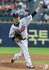

기사제목 : 역투하는 두산 선발 최승용
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7412281_high.jpg
Image : 


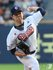

기사제목 : 민주당 "국힘, 한미 협상 좌초 바라는 것처럼 보여…정치 공세 멈춰야"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7412214_high.jpg
Image : 


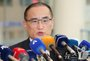

기사제목 : '기적의 골퍼' 그레이스 김 "부모님의 '웰 던' 한마디···긴 여정 담겨있죠"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/se/2025/07/24/2GVH49F2RQ_10.jpg
Image : 


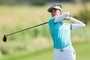

기사제목 : 의대교수 비대위 "본과 4학년, 내년 2월 졸업이 바람직"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7409576_high.jpg
Image : 


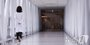

기사제목 : 빈손 귀국한 위성락 "루비오, 트럼프가 긴급 호출해 못 만나"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7412228_high.jpg
Image : 


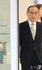

기사제목 : '반백년 다 됐는데···' 여주시 신청사 건립 가시밭길
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/se/2025/07/24/2GVH3TZ4MO_1.jpg
Image : 


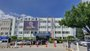

기사제목 : 위성락 안보실장 귀국
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7412229_high.jpg
Image : 


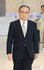

기사제목 : 광주와 작별? 잔류? 아사니 "이적 관련 일은 에이전트가 하는 것"···"나는 다가오는 경기 승리에만 집중" [MK인터뷰]
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/aa/2025/07/24/news-p.v1.20250724.008afb1e215044c5a3a3415cafcc1b48_P1.jpg
Image : 


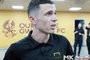

기사제목 : 비이엑스 스피리츠, 순살 치킨 '아웃닭'과 파이어볼 하이볼 및 드래프트 맥주 출시
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/kz/2025/07/24/news-p.v1.20250724.5463504eea244398bb6c5510a339c197_P1.jpg
Image : 


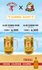

기사제목 : 생애 첫 승 행복한 기억 KT, 이번에는 악몽이었다…목지훈, 0.2이닝 충격의 조기 강판 [창원 현장]
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/sc/2025/07/24/2025072401001789100250841.jpg
Image : 


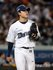

기사제목 : 정현우 '한 번 쳐봐'[포토]
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/xs/2025/07/24/1753350758390596.jpg
Image : 


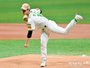

기사제목 : [사진]대기 타석에서 타격 준비하는 KIA 위즈덤
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/pt/2025/07/24/202507241853770092_68820280976fb.jpg
Image : 


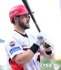

기사제목 : 폰세, 13연승 도전[포토엔HD]
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/nn/2025/07/24/202507241853189431_1.jpg
Image : 


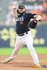

기사제목 : 엔팍 접근성 높인다, 창원관내·김해·진주에서 셔틀버스 운영…팬 친화형 교통 서비스 확대
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/sd/2025/07/24/132066789.1.png
Image : 


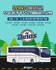

기사제목 : [사진]고승민,'정현우를 상대로 선취 솔로포'
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/pt/2025/07/24/202507241853776839_6882028394f3e.jpg
Image : 


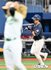

기사제목 : "서울교통공사서 성희롱 2차 피해"…공사 "관련자 인사조치"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/sg/2025/07/24/20250724519250.jpg
Image : 


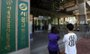

기사제목 : [포토] 고승민 '타격감 살리는 솔로 홈런포'
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/sc/2025/07/24/2025072401001789000250831.jpg
Image : 


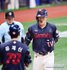

기사제목 : 정현우 '온 힘을 다해서'[포토]
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/xs/2025/07/24/1753350758804378.jpg
Image : 


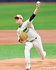

기사제목 : "아내 출금 풀어주면 귀국, 아이 돌봐야"⋯'김건희 집사'에 특검은
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/in/2025/07/24/e05e1881bfa555.jpg
Image : 


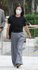

=========정치 입니다.=========
기사제목 : [단독] "왜 이렇게 죽는 사람 많나"…이 대통령, 산재·자살 문제 지적
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/kx/2025/07/24/2025072418380420365_1753349884_1753349009.jpg
Image : 


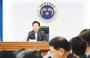

기사제목 : 윤희숙 "안 불렀다" 국힘 "불렀다"…의총 진실게임
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/mh/2025/07/24/news-p.v1.20250724.18fbf290041e4ad8bfe9650fa4234095_P1.jpg
Image : 


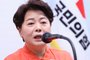

기사제목 : 차마 말 못했던 'VIP 격노', 김태효 이어 이종섭·김계환까지 둑 터졌다
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/oh/2025/07/24/IE003500510_STD.jpg
Image : 


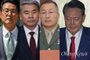

기사제목 : '강선우 지지' 정청래 vs '사퇴 촉구' 박찬대…정반대 선택 왜
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/jo/2025/07/24/328d6f35-c3e3-43e2-ac09-a4966e11c1d9.jpg
Image : 


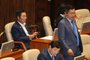

기사제목 : [단독] 김용현, 경호처장 시절 드론사령관 만나 '평양 무인기' 논의
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/ch/2025/07/24/ch_1753338964689_871205_0.jpg
Image : 


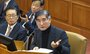

기사제목 : 尹 '2개의 재판' 본격화…특검 기소사건 내달 19일 공판 시작
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/yt/2025/07/24/PYH2025070921000001300_P2.jpg
Image : 


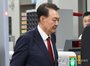

기사제목 : [단독]'시정 홍보용'이라는 '오세훈TV'···2019년 만든 개인채널이었다
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/kh/2025/07/24/news-p.v1.20250724.2c79dd17d5bf413d824d65d4966dd0c8_P1.png
Image : 


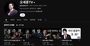

기사제목 : [단독] 내란특검, 노상원 메모서 북 간첩용어 "단선연계" 확인…외환죄 수사 속도
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/hn/2025/07/24/20241225501245.jpg
Image : 


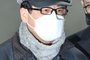

기사제목 : 李 "그럴 것 같다고 말라, 모르면 모른다고 해라"···달라진 국무회의
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/se/2025/07/24/2GVH3UCQ4T_1.jpg
Image : 


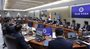

기사제목 : 경주APEC에 김정은 부른다?…정부 "의장국 주도로 비회원국 초청 가능"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/mt/2025/07/24/2025072410392839834_1.jpg
Image : 


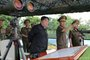

기사제목 : 정성호 법무 첫 검사장 인사 임박…'특수통' 가고 '형사통'으로 물갈이
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7404449_high.jpg
Image : 


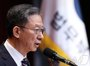

기사제목 : "강선우 한 사람뿐? 술 취해 행패 부린 女의원도"…홍준표 '폭로'
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/ed/2025/07/24/PS25072400712.jpg
Image : 


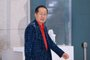

기사제목 : 한동훈, 당대표 선거 불출마…"극우 포획 세력과 단호히 싸울 것"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7366944_high.jpg
Image : 


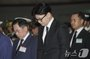

기사제목 : 김문수 "尹, 감옥서 특검 재판…얼마나 답답하고 힘들겠나"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/fn/2025/07/24/202507231747479576_l.jpg
Image : 


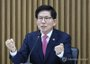

기사제목 : 안철수 "尹, 들이받고 싶었다. 단일화하면 다 주겠다더니…"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/fn/2025/07/24/202507231717371343_l.jpg
Image : 


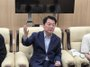

=========경제 입니다.=========
기사제목 : 위성락 "美 거절로 루비오 만남 불발은 오보…유선 협의 진행"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/kx/2025/07/24/2025061511543947787_1749956081_0028445792.jpg
Image : 


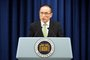

기사제목 : "'칼졸업' 큰일", "첫 월급 300만원도 안돼" 대학생들 '울상'
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/ed/2025/07/24/PS25072400897.jpg
Image : 


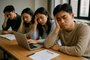

기사제목 : 코스피, 3200선 탈환…美 관세협상·SK하이닉스 실적 영향
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/sg/2025/07/24/20250724505623.jpg
Image : 


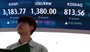

기사제목 : "이게 1만8000원이라고?"…갈치구이 달랑 한 토막에 '충격'
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/hk/2025/07/24/01.41207858.1.jpg
Image : 


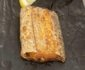

기사제목 : SK하이닉스 또 '사상 최고' 실적…분기 영업익 9조 넘었다
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/hk/2025/07/24/AD.40667208.1.jpg
Image : 


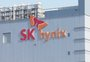

기사제목 : 공인중개소, 문 연 곳보다 닫은 곳 더 많았다…신규 개업 700명 첫 붕괴
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7360611_high.jpg
Image : 


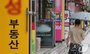

기사제목 : 백만장자보다 귀한 비트코인 1개 보유자…"전 세계 인구 0.02% 불과"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/iu/2025/07/24/579223_541028_3745.png
Image : 


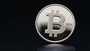

기사제목 : 국내 숙박료가 200만원?…"이제는 진짜 못 참겠다"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/sg/2025/07/24/20250724501062.jpg
Image : 


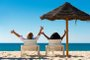

기사제목 : [단독]배당소득 분리과세 최고세율 30%대로…'초부자 감세' 논란 이어질 듯
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/kh/2025/07/24/news-p.v1.20250723.1d2fb21f02c543cead91c26c32ad61c5_P1.jpg
Image : 


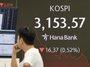

기사제목 : "빚도 늙어간다"…60대 이상 주담대 27%나 급증한 이유
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/jo/2025/07/24/abaa3c83-f64a-49e5-8065-93f22a71473b.jpg
Image : 


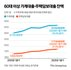

기사제목 : [단독]백종원, 가맹점주 '월세 카드 결제' 이자·수수료 전액 지원한다
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/kh/2025/07/24/news-p.v1.20250723.240a9c7ff98449caaeb4cb595d725454_P1.jpeg
Image : 


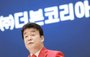

기사제목 : 李정부 50일간 18% 상승…역대 최고 '증시 허니문'
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/do/2025/07/24/132059940.1.png
Image : 


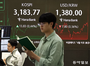

기사제목 : [단독] 보증금 받으러 갔더니 "난 명의만"…'바지 임대인' 내세워 전세사기
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/jt/2025/07/23/20250723192341552001.jpg
Image : 


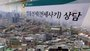

기사제목 : "주가조작 패가망신"…10월부터 과징금 더 세게 때린다
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/hi/2025/07/23/ab4ec5fa-0769-4266-b79a-33fbb358d08b.jpg
Image : 


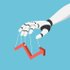

기사제목 : 5월까지 누적 출생아, 10.6만명…증가율 역대 최고 찍었다
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/ns/2025/07/23/NISI20250528_0020829805_web.jpg
Image : 


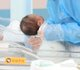

=========사회 입니다.=========
기사제목 : 한여름 이불덮은 찜통 더위…기온 38도 육박, 체감 37도 '후텁지근'
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7411432_high.jpg
Image : 


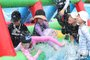

기사제목 : [단독] 삼부토건 이기훈, 도주 2주 전 "나는 감방 못 산다"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/kx/2025/07/24/2025072416023919690_1753340559_0028445376.jpg
Image : 


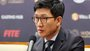

기사제목 : 단체대화방서 여교사 성희롱·외모품평한 제주 남고생들
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7088611_high.jpg
Image : 


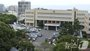

기사제목 : [단독]경찰, '총격 신고' 70분 뒤에야 CCTV 확인…구조-체포 지연
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/do/2025/07/24/132051392.1.jpg
Image : 


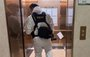

기사제목 : "말 안 듣네, 확 영상 올려버린다"…몰카로 여성 협박한 소방관
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/3048099_high.jpg
Image : 


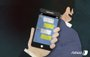

기사제목 : '흑백요리사' 안유성, 침수 피해 나주 찾아 따뜻한 한 끼 전달
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7411417_high.jpg
Image : 


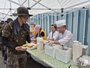

기사제목 : 본과 3학년 졸업 '대학 자율' 가닥…'의대 정상화 방안' 이르면 내일 발표
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7409518_high.jpg
Image : 


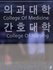

기사제목 : 경찰, 하이브 압수수색…방시혁 부정거래 혐의 관련
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7008506_high.jpg
Image : 


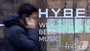

기사제목 : [단독]경찰, 600명 규모 전담인력 투입…보이스피싱 뿌리뽑는다
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/mh/2025/07/24/news-p.v1.20250724.2c3dcd3ef5c549e08a183ba667eb7568_P3.jpg
Image : 


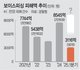

기사제목 : [단독] "엔진 결함 미확인"…사조위, 오른쪽 엔진 '서지' 심각 손상
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/24/7069182_high.jpg
Image : 


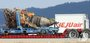

기사제목 : "학원도 학교도 아니었다"…비인가 국제학교의 '민낯'
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/ns/2025/07/24/NISI20250724_0001901242_web.jpg
Image : 


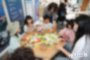

기사제목 : 여고생 3명 사망한 그 학교…숨진 학생 또 있었다. 그리고 그 배후엔
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/hr/2025/07/24/news-p.v1.20250724.36f468922f4543e192dead28c3d54a6f_P1.jpg
Image : 


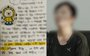

기사제목 : [단독] 오산 옹벽, 개통 전부터 "물 새고 이음부 분리"…보고서 입수
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/jt/2025/07/24/1528176e-625c-46ef-b216-893810b23c0a.jpg
Image : 


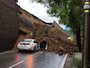

기사제목 : '비상장주식 20배 부풀려 투자 유도' 주식 리딩방 일당 무더기 검거
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/ns/2025/07/24/NISI20250724_0001901185_web.jpg
Image : 


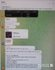

기사제목 : '여장 셀카' 수백장 찍은 남친…"취미라는데 이해해야 하나요?" [어떻게 생각하세요]
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/fn/2025/07/24/202507240810191951_l.jpg
Image : 


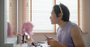

=========세계 입니다.=========
기사제목 : 러 극동서 40여명 탑승 여객기 추락…생존자 없는듯(종합)
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/yt/2025/07/24/PAF20250724176901009_P2.jpg
Image : 


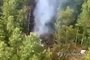

기사제목 : 아시아도 전쟁 위기…태국-캄보디아군 충돌에 민간인 사망 '점입가경' [지금이뉴스]
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/yn/2025/07/24/202507241346303653_t.jpg
Image : 


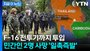

기사제목 : 러시아 아무르서 49명 탄 여객기 연락두절…추락, 전원 숨진 듯
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/ch/2025/07/24/ch_1753344604720_335428_0.jpg
Image : 


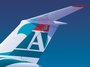

기사제목 : "모든 걸 훔친거냐?" 中네티즌도 욕한 '흑백요리사 중국판'
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/fn/2025/07/24/202507240926331323_l.jpg
Image : 


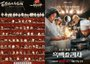

기사제목 : "휴가 못 가겠는데" 日 홋카이도, 40도 육박…"날씨가 재해 그 자체"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/fn/2025/07/24/202507240919125231_l.jpg
Image : 


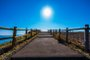

기사제목 : "노상방뇨 지린내, 더 못 참아"…딸기향으로 덮겠다는 프랑스 도시
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/ch/2025/07/24/ch_1753319284822_668080_0.jpg
Image : 


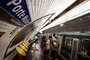

기사제목 : 쌀+α 주고 10%P 깎은 일본, 한국도 비상
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/jo/2025/07/24/a29c17dd-8ffa-4d44-a1f0-fd657dfb4a37.jpg
Image : 


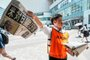

기사제목 : 中, 흑백요리사 베꼈나…넷플릭스 "판권 판적 없다"
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/ns/2025/07/24/NISI20250724_0001901197_web.jpg
Image : 


기사제목 : 러·우크라 3차 협상, 큰 성과 없이 끝…포로 추가교환만 합의(종합)
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/yt/2025/07/24/PRU20250724082101009_P2.jpg
Image : 


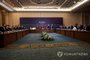

기사제목 : "크루아상 배달비만 70만원?"…뉴욕 부자들 몰리는 '초고가 맞춤 택배' 뭐길래
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/se/2025/07/23/2GVGL7XBNJ_1.jpg
Image : 


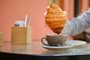

=========IT/과학 입니다.=========
기사제목 : "공짜폰에 현금까지" 보조금 전쟁 시작…지갑 열리나
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/ed/2025/07/24/PS25072401111.jpg
Image : 


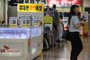

기사제목 : "이게 된다고?" 노화 근육 되살린다…세계 최초 '근육 회복 단백질' 발견
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/hr/2025/07/24/news-p.v1.20250724.52f768a776a445769187d595ea2ec286_P1.jpg
Image : 


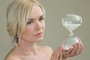

기사제목 : '23층 아파트' 크기 소행성, 지구 향해 돌진 중…"몇 주 내 3개 더 온다" [핫이슈]
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/no/2025/07/24/SSC_20250724102611_V.jpg
Image : 


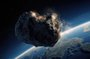

기사제목 : 갤럭시 Z 플립7 써보니 디자인 완성형인데…카메라 아쉽네 [1일IT템]
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/fn/2025/07/24/202507231723366184_l.jpg
Image : 


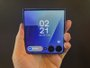

기사제목 : 아이폰·애플워치에서 사용 가능해진 티머니, 'Q&A 총정리'
기사링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/ss/2025/07/24/202551491753262215.jpg
Image : 


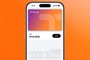

In [89]:
# https://news.nate.com/recent?mid=n0100
# 최신뉴스, 정치 , 경제, 사회, 세계, IT/과학 
# 6개의 섹션의 뉴스를 출력하는 함수를 생성하여 스크래핑 하기

# Image, 기사제목, 기사링크

# 뉴스기사의 Image를 출력 하세요 
# 1) Image의 도메인이름이 포함된 경로와 src 속성의 경로를 합치려면 urljoin 함수를 사용하세요.
#     from urllib.parse import urljoin
    
#     url = ‘https://news.nate.com/recent?mid=n0100’
#     src=’ //thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/07/23/7408335_high.jpg’

# 2) Image 출력은 Image 클래스와 display 함수를 사용하세요.
#     from IPython.display import Image, display

# 3) img 엘리먼트의 존재 여부를 체크하신 후에 src 속성의 이미지를 경로를 추출하기
#   => Image 가 없는 뉴스도 있기 때문에 
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image, display
from pprint import pprint

req_header = {

    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36" 
}
section_dict = {'최신뉴스':'recent?mid=n0100','정치':'section?mid=n0200','경제':'section?mid=n0300',
                '사회':'section?mid=n0400','세계':'section?mid=n0500','IT/과학':'section?mid=n0600'}



def print_news_image(section_name):
    sid = section_dict[section_name]
    url = f'https://news.nate.com/{sid}'
    res = requests.get(url,headers=req_header)
    res.encoding = 'euc-kr'
    
    if res.ok:
        html = res.text
        soup = BeautifulSoup(html,'html.parser')
        

        a_tags = soup.select("div.mlt01 a[href*='//news.nate.com/view/']")
        #3) img 엘리먼트의 존재 여부를 체크
        for a_tag in a_tags: #img_tag의 타입은 Tag <img>
            #Title추출
            h2_tags = a_tag.select_one("span.tb h2.tit")
            
            print(f'기사제목 : {h2_tags.text}')

            img_tags = a_tag.select("img[src*='//thumbnews.nateimg.co.kr/news90']")
            for img_tag in img_tags:
                if img_tag:
                    img_url = img_tag['src']
                    #1) Image의 도메인이름이 포함된 경로와 src 속성의 경로를 합치려면 urljoin 함수를 사용하세요.
                    join_url = urljoin(url,img_url) #기준(base) URL과 상대(relative) URL을 합쳐 절대 URL을 생성

                    print(f'기사링크 : {join_url}')
                    #2) Image 출력은 Image 클래스와 display 함수를 사용
                    print(f'Image : ')
                    display(Image(join_url))
                else :
                    print("이미지를 찾을 수 없습니다.")



            
    else:
        print(f'Error Code = {res.status_code}')

for section in section_dict:
    print(f'========={section} 입니다.=========')
    print_news_image(section)

2-2. 하나의 네이버 웹툰과 1개의 회차에 대한 Image 다운로드 하기 

In [ ]:
# :  하나의 웹툰의 제목(title)과 회차번호(no),회차의URL(url) 을 입력으로 받는 함수를 선언합니다. 
#    def download_one_episode(title,no,url):

# 아래와 같이 호출합니다.
# download_one_episode('일렉시드',341,'https://comic.naver.com/webtoon/detail?titleId=717481&no=341&week=wed')

# img\일렉시드\341 디렉토리가 생성되며 , 
# 그 디렉토리 아래에 웹툰 image들이 다운로드 되도록 해주세요.

import requests
from bs4 import BeautifulSoup
import os

def download_one_episode(title,no,url):
    imgdir_name = os.path.join('img', title, str(no))
    req_header = {'referer': url}

    # 이미지 저장 폴더가 없으면 생성
    os.makedirs(imgdir_name, exist_ok = True)
    res = requests.get(url)
    if not res.ok:
        print(f'Error Code = {res.status_code}')
        exit()
    # 이미지 URL 추출
    soup = BeautifulSoup(res.text, 'html.parser')

    img_url_list = [img_tag['src'] for img_tag in soup.select("img[src *= IMAG01]")]
    #print(img_url_list)
    #이미지 다운로드
    for img_url in img_url_list:
        res = requests.get(img_url, headers=req_header)
        if res.ok:
            img_data = res.content
            file_path = os.path.join(imgdir_name, os.path.basename(img_url))
            with open(file_path, 'wb') as file:
                #print(f'Wrting to {file_path} ({len(img_data):,} bytes)')
                file.write(img_data)

        else:
            print(f'Error Code = {res.status_code}')
    print(f"네이버 웹툰의 '{title}' 만화 {no}회를 다운로드 하였습니다.")
    print(f'{imgdir_name} 폴더에 있습니다.')
#호출
download_one_episode('일렉시드',341,'https://comic.naver.com/webtoon/detail?titleId=717481&no=341&week=wed')

네이버 웹툰의 '일렉시드' 만화 341회를 다운로드 하였습니다.
img\일렉시드\341에 있습니다.
